In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import datetime
from datetime import *
import optuna
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df = pd.read_csv('C:\\Users\\yashs\\OneDrive\\Desktop\\Machine Learning\\Social Media Tourism project\\With_missing_values_imputed.csv')

In [3]:
df.head()

,buy,following_company_page,Yearly_avg_comment_on_travel_page,preferred_location_type,yearly_avg_Outstation_checkins,total_likes_on_outstation_checkin_given,Yearly_avg_view_on_travel_page,member_in_family,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,1.0,94.0,Financial,1.0,38570.0,307.0,2,5993,8,11,0,4,0,8
1,0,0.0,61.0,Financial,1.0,9765.0,367.0,1,5130,1,23,1,1,1,10
2,1,1.0,92.0,Other,1.0,48055.0,277.0,2,2090,6,15,0,3,0,7
3,0,1.0,56.0,Financial,1.0,48720.0,247.0,4,2909,1,11,0,2,0,8
4,0,0.0,40.0,Medical,1.0,20685.0,202.0,1,3468,9,12,0,1,1,6


In [4]:
df['preferred_location_type'] = np.where(df['preferred_location_type']=='Tour  Travel','Tour and Travel',df['preferred_location_type'])

### pd.get_dummies

In [5]:
cat_col = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [6]:
df = pd.get_dummies(df,columns=cat_col,drop_first=True)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('buy',axis=1)
Y = df['buy']

In [9]:
X1,valid_X,Y1,valid_Y = train_test_split(X,Y,test_size=0.1,stratify=Y)

In [10]:
print(X1.shape)
print(Y1.shape)
print(valid_X.shape)
print(valid_Y.shape)

(9585, 26)
(9585,)
(1066, 26)
(1066,)


### Modeling with Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
skf = StratifiedKFold(n_splits=10)

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size=0.3,stratify=Y1)

In [14]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(6709, 26)
(6709,)
(2876, 26)
(2876,)


In [15]:
0.01*6709

67.09

### Hyperparameter tuning

In [1]:
import numpy as np

In [2]:
a1 = np.array([130,150,170,190,210,250])

In [3]:
a2 = 2*np.array([130,150,170,190,210,250])

In [16]:
# params = {'n_estimators':500,'criterion':['gini','entropy'],'max_features':[0.3,0.4,0.5,0.7,0.8],'max_depth':list(range(3,10)),
#          'min_samples_leaf':np.array([130,150,170,190,210,250]),'min_samples_split':2*np.array([130,150,170,190,210,250]),
#          'bootstrap':[True,False]}

In [17]:
# def objective(trial):
#     n_estimators=trial.suggest_int("n_estimators",100,1000,step=1)
#     max_depth=trial.suggest_int("max_depth",3,10,step=1)
#     min_samples_leaf=trial.suggest_int("min_samples_leaf",low=130,high=250,step=20)
#     min_samples_split=trial.suggest_int("min_samples_split",low=260,high=500,step=40)
#     max_features=trial.suggest_float("max_features",low=0.3,high=0.8,step=0.1)
#     bootstrap = trial.suggest_categorical('bootstrap',[True,False])                                            
#     skf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
#     cv_scores = []
#     for (train_idx,test_idx) in (skf.split(X1,Y1)):
#       X_train,Y_train = X1.iloc[train_idx],Y1.iloc[train_idx]
#       X_test,Y_test = X1.iloc[test_idx],Y1.iloc[test_idx]
#       rfc = RandomForestClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,max_features=max_features,n_estimators=n_estimators,class_weight='balanced_subsample',n_jobs=-1,bootstrap=bootstrap)
#       rfc.fit(X_train,Y_train)
#       preds = rfc.predict(X_test)
#       precision=metrics.precision_score(Y_test,preds)
#       cv_scores.append(precision)
#     return np.mean(cv_scores)

In [18]:
# study_rfc = optuna.create_study(direction="maximize",study_name="max-precision")

In [19]:
# start = datetime.now()
# study_rfc.optimize(objective,n_trials=100)

============Training fold 0============
Fold 0 finished with score: 0.68085 in 15.17 seconds.

============Training fold 1============
Fold 1 finished with score: 0.7551 in 14.89 seconds.

============Training fold 2============
Fold 2 finished with score: 0.88889 in 14.07 seconds.

============Training fold 3============
Fold 3 finished with score: 0.64444 in 14.01 seconds.

============Training fold 4============
Fold 4 finished with score: 0.74359 in 13.93 seconds.

============Training fold 5============
Fold 5 finished with score: 0.85 in 14.18 seconds.

============Training fold 6============
Fold 6 finished with score: 0.70455 in 15.24 seconds.

============Training fold 7============
Fold 7 finished with score: 0.81395 in 15.56 seconds.

============Training fold 8============
Fold 8 finished with score: 0.84444 in 15.1 seconds.

============Training fold 9============
Fold 9 finished with score: 0.73333 in 15.26 seconds.

Average precision score is 0.7659152902264517


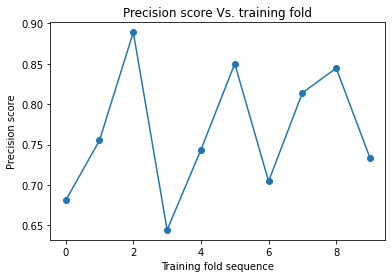

In [20]:
#best_params
best_param = {'n_estimators': 926,'max_depth': 10,'min_samples_leaf': 130,'min_samples_split': 260,'max_features': 0.6000000000000001,'bootstrap': False}
precision_score = []
idx1 = []
for idx,(train_idx,test_idx) in enumerate(skf.split(X1,Y1)):
    print("="*12+"Training fold {}".format(idx)+"="*12)
    X2_train,X2_test = X1.iloc[train_idx,:],X1.iloc[test_idx,:]
    Y2_train,Y2_test = Y1.iloc[train_idx],Y1.iloc[test_idx]
    start = datetime.now()
    rfc_cv = RandomForestClassifier(**best_param)
    rfc_cv.fit(X2_train,Y2_train)
    y_pred = rfc_cv.predict(X2_test)
    precision=metrics.precision_score(Y2_test,y_pred)
    precision_score.append(precision)
    idx1.append(idx)
    runtime = datetime.now() - start
    print("Fold {} finished with score: {} in {} seconds.\n".format(idx,np.round(precision,5),np.round(runtime.total_seconds(),2)))
Avg_precision_score = np.mean(precision_score)
print("="*24)
print("Average precision score is {}".format(Avg_precision_score))
plt.plot(idx1,precision_score,marker='o')
plt.title('Precision score Vs. training fold')
plt.xlabel('Training fold sequence')
plt.ylabel('Precision score')
plt.show()

In [21]:
Metrics = pd.DataFrame(columns=["Random_forest_tuned_cv_0.1_test"],index=["Precision","Recall","F1-score","AUROC","Avg_precision"])

In [22]:
def checking_performance_cv(valid_X,valid_Y,cv_model,model_name,train):
    preds=cv_model.predict(valid_X)
    valid_X_prob=cv_model.predict_proba(valid_X)
    precision = metrics.precision_score(valid_Y,preds)
    recall = metrics.recall_score(valid_Y,preds)
    f1_score = metrics.f1_score(valid_Y,preds)
    auroc=metrics.roc_auc_score(valid_Y,valid_X_prob[:,1])
    auprc=metrics.average_precision_score(valid_Y,valid_X_prob[:,1])
    if train:
        Metrics[model_name+'_cv_updated_train'] = [precision,recall,f1_score,auroc,auprc]
    else:
        Metrics[model_name+'_cv_updated_test'] = [precision,recall,f1_score,auroc,auprc]
    return sns.heatmap(confusion_matrix(valid_Y,preds),annot=True,fmt="d",cbar=False,cmap="YlGnBu"),print(classification_report(valid_Y,preds))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       904
           1       0.85      0.25      0.38       162

    accuracy                           0.88      1066
   macro avg       0.87      0.62      0.66      1066
weighted avg       0.88      0.88      0.85      1066



(<AxesSubplot:>, None)

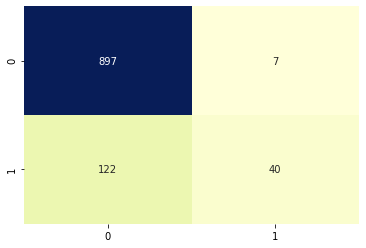

In [23]:
checking_performance_cv(valid_X,valid_Y,rfc_cv,'0.1_tuned',True)

In [24]:
Metrics.rename(columns={'0.1_tuned_cv_updated_train':'Random_forest_0.1_tuned_cv_updated_train'},inplace=True)

In [25]:
Metrics.drop('Random_forest_tuned_cv_0.1_test',axis=1,inplace=True)

In [26]:
Metrics.apply(lambda x:np.round(x,2))

,Random_forest_0.1_tuned_cv_updated_train
Precision,0.85
Recall,0.25
F1-score,0.38
AUROC,0.90
Avg_precision,0.64


              precision    recall  f1-score   support

           0       0.88      0.99      0.93       904
           1       0.85      0.25      0.38       162

    accuracy                           0.88      1066
   macro avg       0.87      0.62      0.66      1066
weighted avg       0.88      0.88      0.85      1066



(<AxesSubplot:>, None)

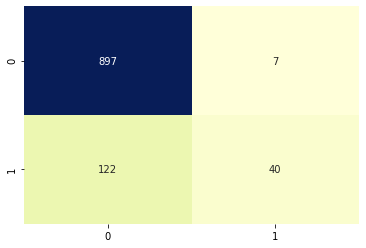

In [27]:
checking_performance_cv(valid_X,valid_Y,rfc_cv,'0.1_tuned',False)

In [28]:
Metrics=Metrics.apply(lambda x:np.round(x,2))

In [29]:
Metrics

,Random_forest_0.1_tuned_cv_updated_train,0.1_tuned_cv_updated_test
Precision,0.85,0.85
Recall,0.25,0.25
F1-score,0.38,0.38
AUROC,0.90,0.90
Avg_precision,0.64,0.64
